In [8]:
import numpy as np 
from scipy.optimize import curve_fit
import scipy.signal as sig 
import matplotlib.pyplot as plt 
from ipywidgets import interact

In [10]:
def time_to_boil(Tf, V):
    Cp = 4.186
    t = (Cp*V*(Tf - 22)*1000*1.1)/3000
    return t
Vspan = [30,40,50,60,70,80,90,100]
Tlist = [time_to_boil(95, V) for V in Vspan]


In [12]:
tf = 12000
tspan = np.linspace(0, tf, ((tf+1)*10) )

In [14]:
def Q_in(t):
    if t<0:
        return 0
    if t>=0:
        return 3000

In [15]:
def Resp(tspan, τ, ζ):
    K = (95-22)/3000
    U = [Q_in(t) for t in tspan]
    Gp = sig.lti([K], [τ, 2*ζ*τ, 1])
    _, T, _ = sig.lsim(Gp, U, tspan)
    T = T + 22
    return T

In [16]:
parms = np.array([[330, 1], 
         [390, 1.08], 
         [440, 1.28], 
         [520, 1.39], 
         [570, 1.47], 
         [590, 1.57], 
         [625, 1.65], 
         [720, 1.67]])


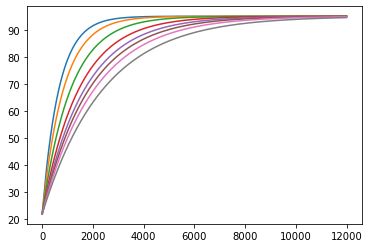

In [17]:
for parm in parms:
    plt.plot(tspan, Resp(tspan, *parm))

In [18]:
def Linear_approx(V, m, c):
    return m*V + c

In [19]:
beta1, _ = curve_fit(Linear_approx,Vspan,  parms.T[0], p0 = [50,1])
beta2, _ = curve_fit(Linear_approx,Vspan,  parms.T[1], p0 = [50,1])

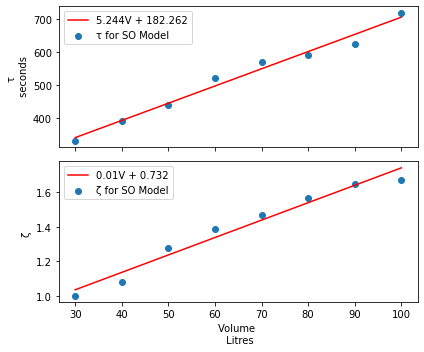

In [20]:
fig1, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
fig1.set_figheight(6)
fig1.set_figheight(5)
ax1.plot(Vspan, [Linear_approx(V, *beta1) for V in Vspan], color = 'r', label = str(np.round(beta1[0], 3) )+'V'+' + ' + str(np.round(beta1[1], 3)))
ax1.scatter(Vspan, parms.T[0], label = 'τ for SO Model')
ax1.set(ylabel='τ \n seconds')
ax1.legend(loc = 'best')

ax2.plot(Vspan, [Linear_approx(V, *beta2) for V in Vspan], color = 'r', label = str(np.round(beta2[0], 3) )+'V'+' + ' + str(np.round(beta2[1], 3)))
ax2.scatter(Vspan, parms.T[1], label = 'ζ for SO Model')
ax2.set(xlabel='Volume \n Litres', ylabel='ζ ')
ax2.legend(loc = 'best')

fig1.tight_layout()
fig1.show()